# The Spark Foundation-Grip - Data Science and Bussiness Analytics- June 2022

## Task 2: Prediction Using Unsupervised ML


# Author - Abhay Swarnkar
##### github link-

# Dataset used: Iris dataset

(*) It can be Download through the following link- https://bit.ly/3kXTdox

## Problem Statement(s):

(*) Predict the optimum number of clusters


(*) Represent Cluster it Visually 

### Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline 
from sklearn.cluster import KMeans

### Loading the DataSet

In [8]:
df=datasets.load_iris()
data=pd.DataFrame(df.data,columns=df.feature_names)

In [10]:
data.head() # print Head section

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
print("Shape of Dataset:-",data.shape)
data.describe()

Shape of Dataset:- (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
pd.DataFrame(data)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
data.isnull().sum() # check value, that's do'nt have mising value

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [26]:
data.corr() #Now use corr() function to find the correlation among the columns. We are only having four numeric columns in the dataframe.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


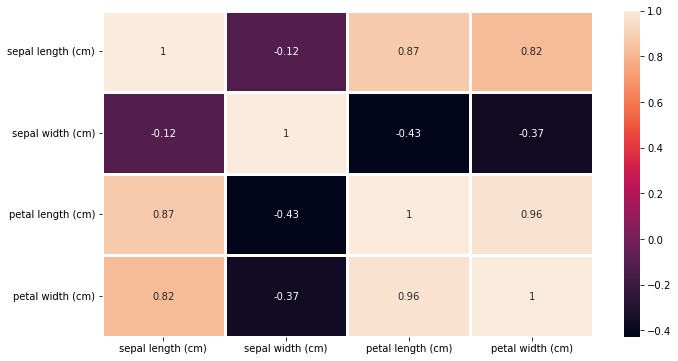

In [32]:
plt.figure(figsize = (11,6))
sns.heatmap(data.corr(),annot=True, linewidth=3)
plt.show()

# Finding the Optimum number of clusters for K-means Cluster

In [34]:
# optimum number of clusters
# WCSS- within cluster  sum of squares
x=data.iloc[:,[0,1,2,3]].values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In cluster analysis, elbow mehtod is a heuristic used in determining the number of cluster in data set.

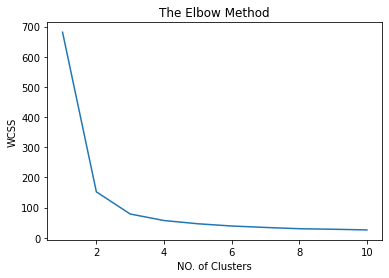

In [37]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("NO. of Clusters")
plt.ylabel("WCSS")
plt.show()

## Applying  K-mean Cluster

In [38]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

# Visualizing the clusters

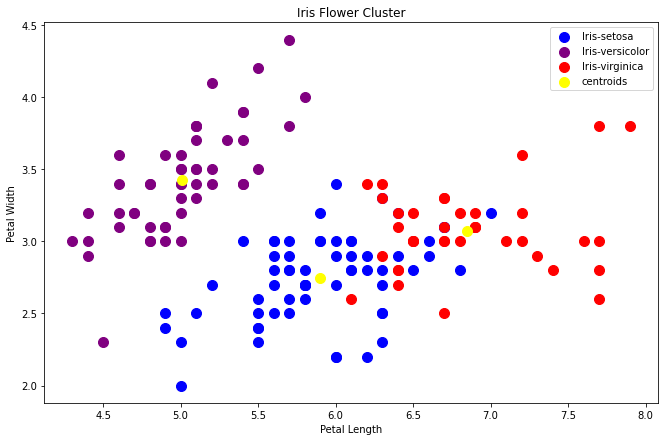

In [47]:
plt.figure(figsize=(11,7))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='blue',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='purple',label='Iris-versicolor')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='red',label='Iris-virginica')
#plotting Centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='centroids')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Flower Cluster')
plt.legend()
plt.show()

This concludes the k-Means Cluster Workshop.